<a href="https://colab.research.google.com/github/yasamankfd/2-functions-With-Thread/blob/master/Imdb_LSTM_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
num_words = 10000  # Use the top 10,000 most common words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)


17464789/17464789 [==============================] - 0s 0us/step


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
num_words = 10000  # Use the top 10,000 most common words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)


In [4]:
maxlen = 200  # Maximum length of a review
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the model
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
batch_size = 32
epochs = 5

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/5
782/782 [==============================] - 599s 759ms/step - loss: 0.4306 - accuracy: 0.8006 - val_loss: 0.4489 - val_accuracy: 0.8232
Epoch 2/5
782/782 [==============================] - 577s 738ms/step - loss: 0.2726 - accuracy: 0.8926 - val_loss: 0.3579 - val_accuracy: 0.8567
Epoch 3/5
782/782 [==============================] - 590s 754ms/step - loss: 0.1959 - accuracy: 0.9260 - val_loss: 0.3463 - val_accuracy: 0.8658
Epoch 4/5
782/782 [==============================] - 578s 739ms/step - loss: 0.1784 - accuracy: 0.9320 - val_loss: 0.4117 - val_accuracy: 0.8568
Epoch 5/5
782/782 [==============================] - 571s 730ms/step - loss: 0.1135 - accuracy: 0.9602 - val_loss: 0.4283 - val_accuracy: 0.8618


In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype("int32")


782/782 [==============================] - 51s 65ms/step - loss: 0.4283 - accuracy: 0.8618
Test Accuracy: 0.86
782/782 [==============================] - 50s 63ms/step


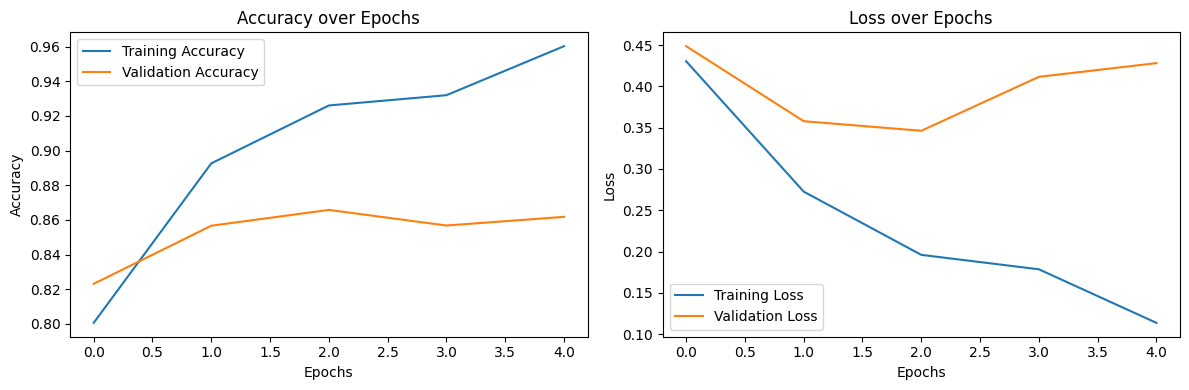

In [8]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()